**Phase** 1: Data Collection and Exploration

In [ ]:
# Cell 1: Install necessary packages
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn

In [ ]:
# Cell 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cell 3: Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

In [ ]:
# Cell 4 (revised): Download Bitcoin data and fix column display
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d')
print(f"Fetching BTC-USD data from {start_date} to {end_date}")

# Download data
btc_data = yf.download('BTC-USD', start=start_date, end=end_date)

# Fix the column names
btc_data.columns = [col[0] for col in btc_data.columns]

# Option 1: Reset index to make Date a visible column
btc_data_with_date = btc_data.reset_index()
print("\nOption 1: DataFrame with Date as a column:")
print(btc_data_with_date.head())

# For our analysis, we'll use Option 1
btc_data = btc_data.reset_index()
print(f"\nData shape after adding Date column: {btc_data.shape}")

# Verify column names including Date
print("\nUpdated column names with Date:")
for col in btc_data.columns:
    print(f"- {col}")


[*********************100%***********************]  1 of 1 completed

Fetching BTC-USD data from 2020-04-13 to 2025-04-12

Option 1: DataFrame with Date as a column:
        Date        Close         High          Low         Open       Volume
0 2020-04-13  6845.037598  6965.616699  6668.259766  6965.616699  38619308647
1 2020-04-14  6842.427734  6958.557129  6793.821289  6843.281738  34110434052
2 2020-04-15  6642.109863  6928.664551  6633.402832  6845.561523  32288311031
3 2020-04-16  7116.804199  7134.450684  6555.504395  6640.454102  46783242377
4 2020-04-17  7096.184570  7167.183105  7050.332031  7116.552734  32513423567

Data shape after adding Date column: (1825, 6)

Updated column names with Date:
- Date
- Close
- High
- Low
- Open
- Volume


In [ ]:
# Cell 5 (revised): Display with proper column names
print("First 5 rows of Bitcoin data:")
btc_data.head()

# Verify column names are simplified
print("\nUpdated column names:")
for col in btc_data.columns:
    print(f"- {col}")

First 5 rows of Bitcoin data:

Updated column names:
- Date
- Close
- High
- Low
- Open
- Volume


In [ ]:
# Cell 6: Check for missing values
print("Missing values in each column:")
print(btc_data.isnull().sum())

# If there are missing values, handle them
if btc_data.isnull().sum().sum() > 0:
    btc_data = btc_data.fillna(method='ffill')  # Forward fill
    print("Missing values after filling:")
    print(btc_data.isnull().sum())



Missing values in each column:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
# Cell 7: Basic statistics
btc_data.describe()

,Date,Close,High,Low,Open,Volume
count,1825,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03
mean,2022-10-12 00:00:00,40996.489742,41846.995939,40019.702542,40956.971812,3.361160e+10
min,2020-04-13 00:00:00,6642.109863,6928.664551,6555.504395,6640.454102,5.331173e+09
25%,2021-07-13 00:00:00,22572.839844,23018.951172,22011.261719,22487.986328,2.043842e+10
50%,2022-10-12 00:00:00,37138.234375,37952.878906,35791.425781,37128.445312,2.964060e+10
75%,2024-01-11 00:00:00,57750.175781,59062.070312,56419.414062,57729.890625,4.076272e+10
max,2025-04-11 00:00:00,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11
std,NaN,23567.547009,24057.957670,23021.430833,23561.514571,2.032265e+10


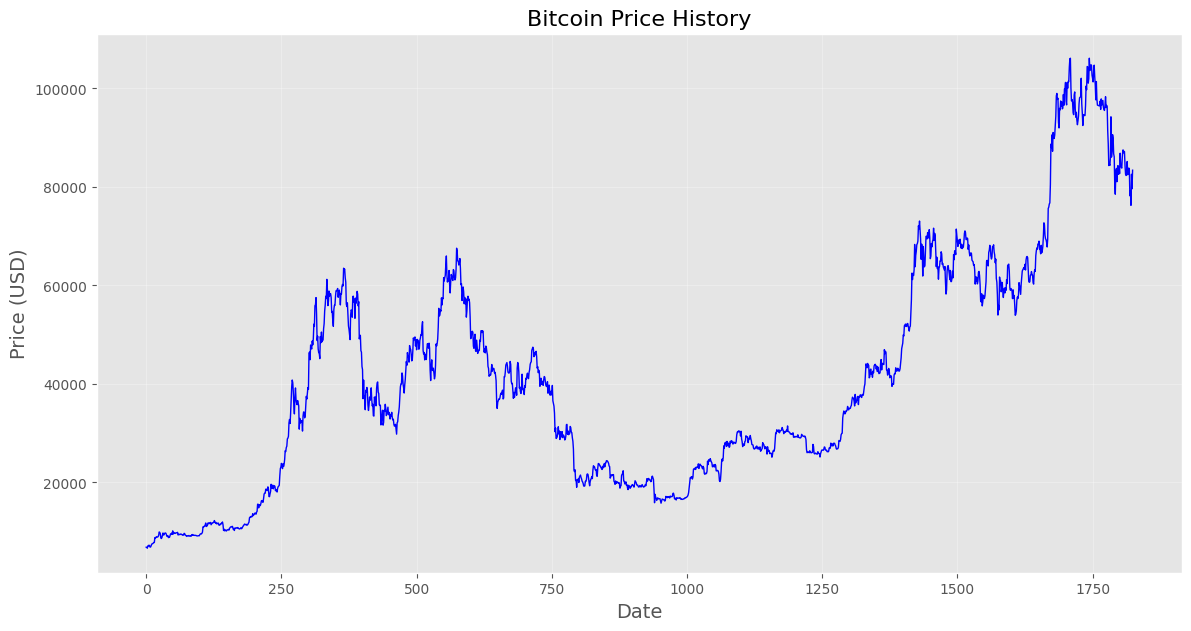

In [ ]:
# Cell 8: Visualize BTC price over time
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], color='blue', linewidth=1)
plt.title('Bitcoin Price History', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

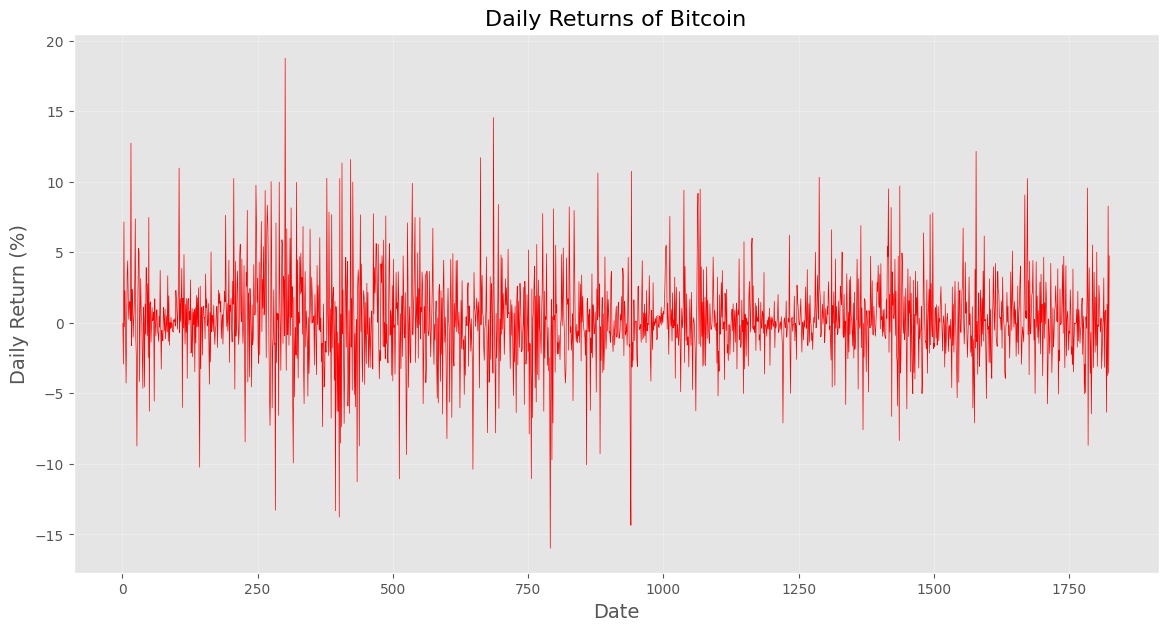

In [ ]:
# Cell 9: Plot daily returns
btc_data['Daily_Return'] = btc_data['Close'].pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Daily_Return'], color='red', linewidth=0.5)
plt.title('Daily Returns of Bitcoin', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

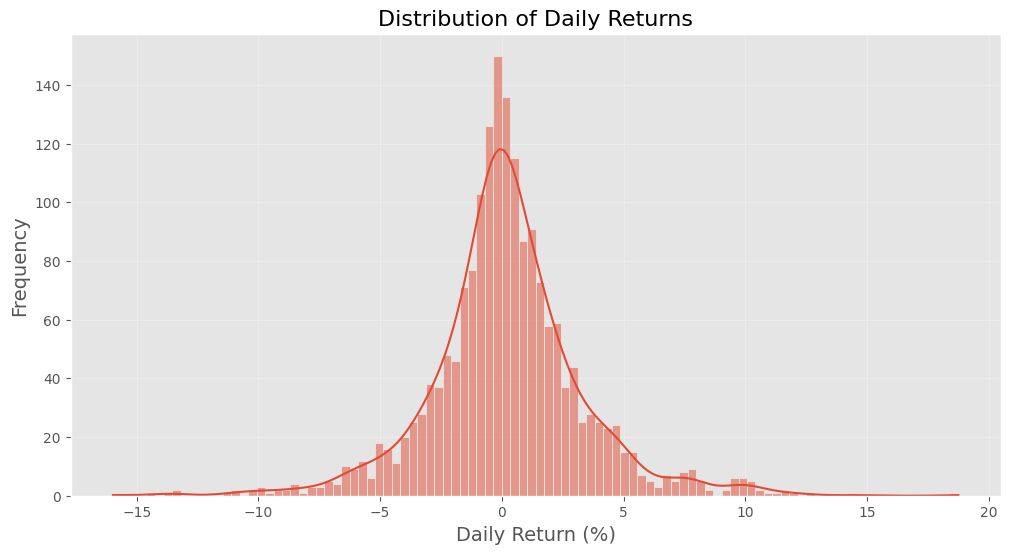

In [ ]:
# Cell 10: Distribution of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(btc_data['Daily_Return'].dropna(), kde=True, bins=100)
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


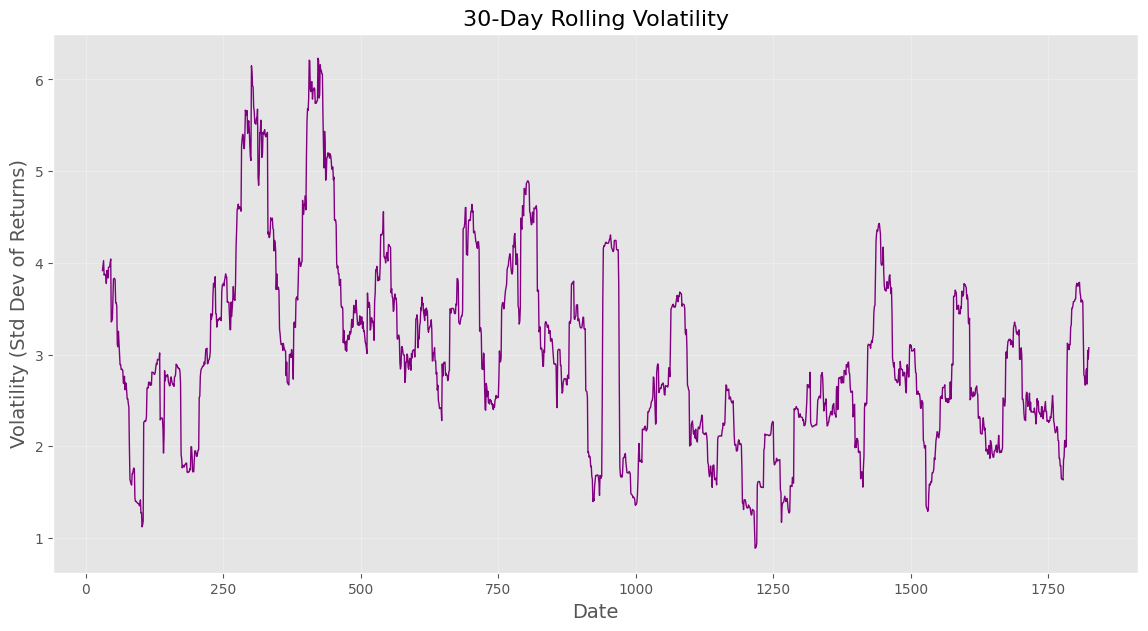

In [ ]:
# Cell 11: Analyze volatility (30-day rolling standard deviation)
btc_data['Volatility'] = btc_data['Daily_Return'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Volatility'], color='purple', linewidth=1)
plt.title('30-Day Rolling Volatility', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility (Std Dev of Returns)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Cell 12: Create features for time series analysis
# Add lag features (previous day's prices)
for i in range(1, 8):
    btc_data[f'Close_Lag_{i}'] = btc_data['Close'].shift(i)

# Add moving averages
for window in [7, 14, 30, 60]:
    btc_data[f'MA_{window}'] = btc_data['Close'].rolling(window=window).mean()

# Add price momentum (percentage change over different periods)
for period in [7, 14, 30]:
    btc_data[f'Momentum_{period}'] = btc_data['Close'].pct_change(periods=period) * 100

# Drop NaN values
btc_data_cleaned = btc_data.dropna()
print(f"Shape after feature creation and cleaning: {btc_data_cleaned.shape}")

Shape after feature creation and cleaning: (1766, 22)


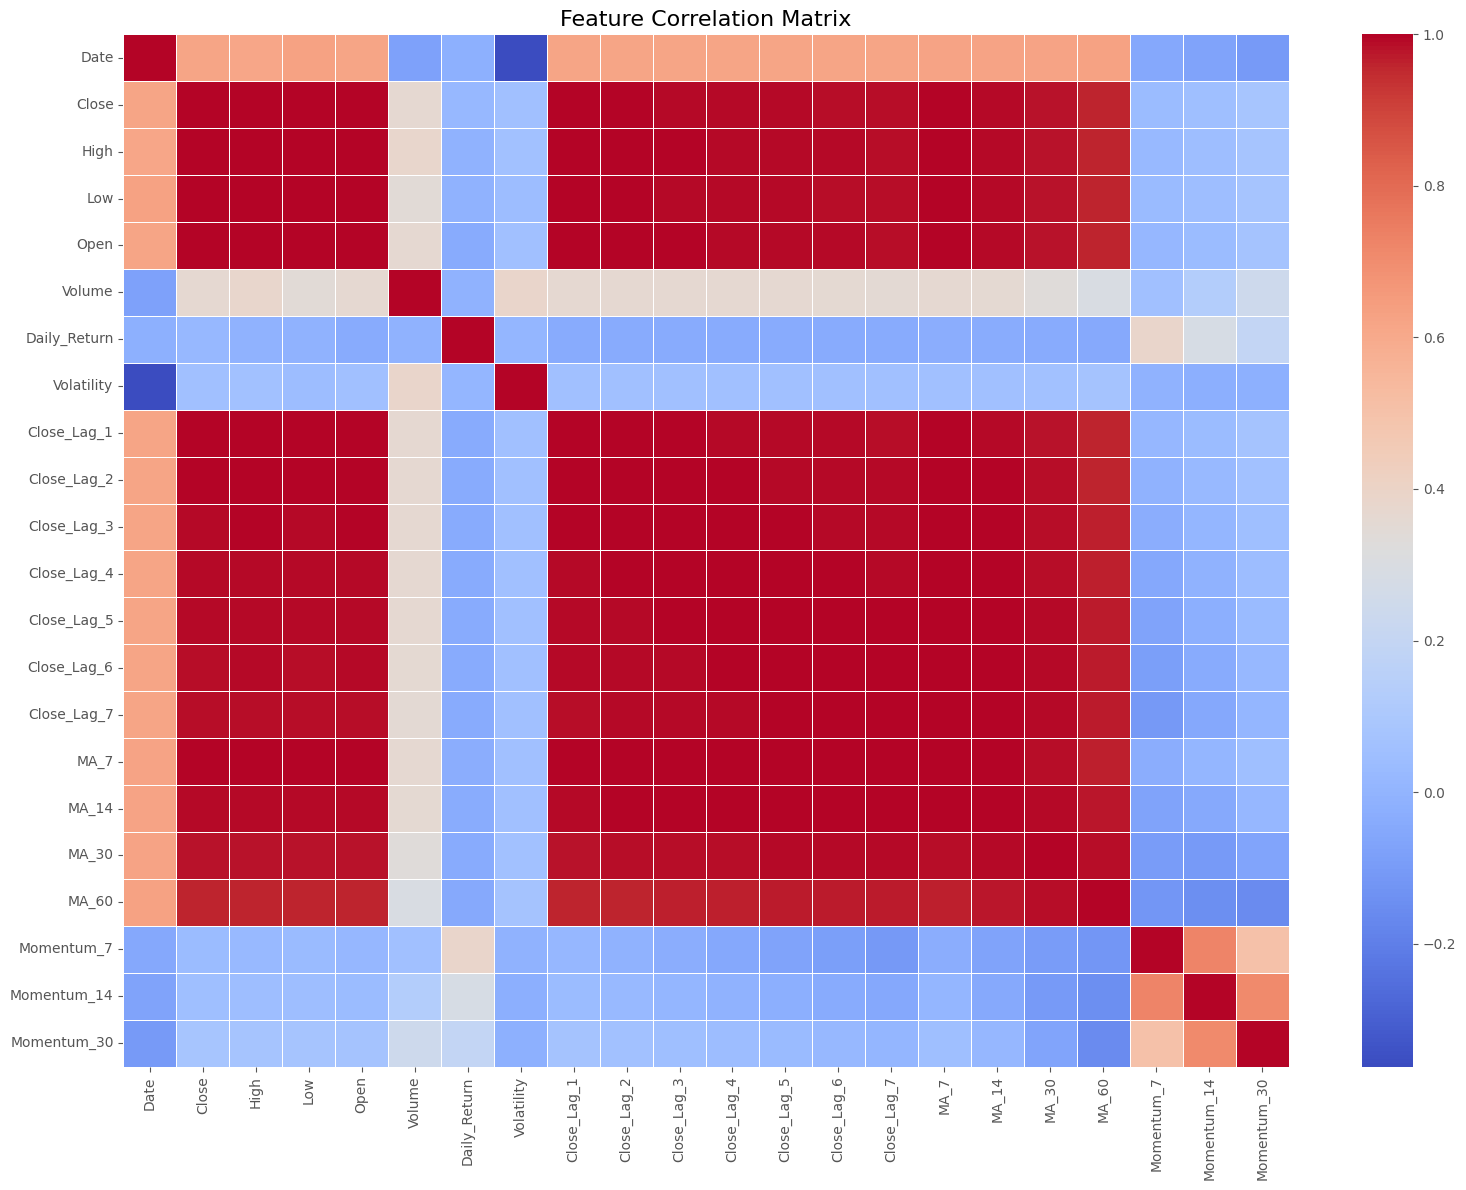

In [ ]:
# Cell 13: Check feature correlation
plt.figure(figsize=(16, 12))
correlation_matrix = btc_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 14: Prepare data for time series analysis
# We'll use 'Close' price as our target variable
target_column = 'Close'
feature_columns = [col for col in btc_data_cleaned.columns if col != target_column and 'Daily_Return' not in col and 'Volatility' not in col]

# Display the feature columns we'll use for modeling
print("Features for modeling:")
print(feature_columns)


Features for modeling:
['Date', 'High', 'Low', 'Open', 'Volume', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5', 'Close_Lag_6', 'Close_Lag_7', 'MA_7', 'MA_14', 'MA_30', 'MA_60', 'Momentum_7', 'Momentum_14', 'Momentum_30']


In [ ]:
# Cell 15: Save the processed data to use in the next phase
btc_data_cleaned.to_csv('btc_data_processed.csv')
print("Data saved to 'btc_data_processed.csv'")

Data saved to 'btc_data_processed.csv'


In [ ]:
# Cell 16: Prepare for stationarity check (Augmented Dickey-Fuller test)
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, window=252):
    # Rolling statistics
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    # Plot rolling statistics
    plt.figure(figsize=(14, 7))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label=f'Rolling Mean ({window} days)')
    plt.plot(rolling_std, color='green', label=f'Rolling Std ({window} days)')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation ({window} days window)')
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    # Interpret results
    if dftest[1] <= 0.05:
        print("Result: The series is stationary (reject the null hypothesis of non-stationarity)")
    else:
        print("Result: The series is non-stationary (fail to reject the null hypothesis of non-stationarity)")

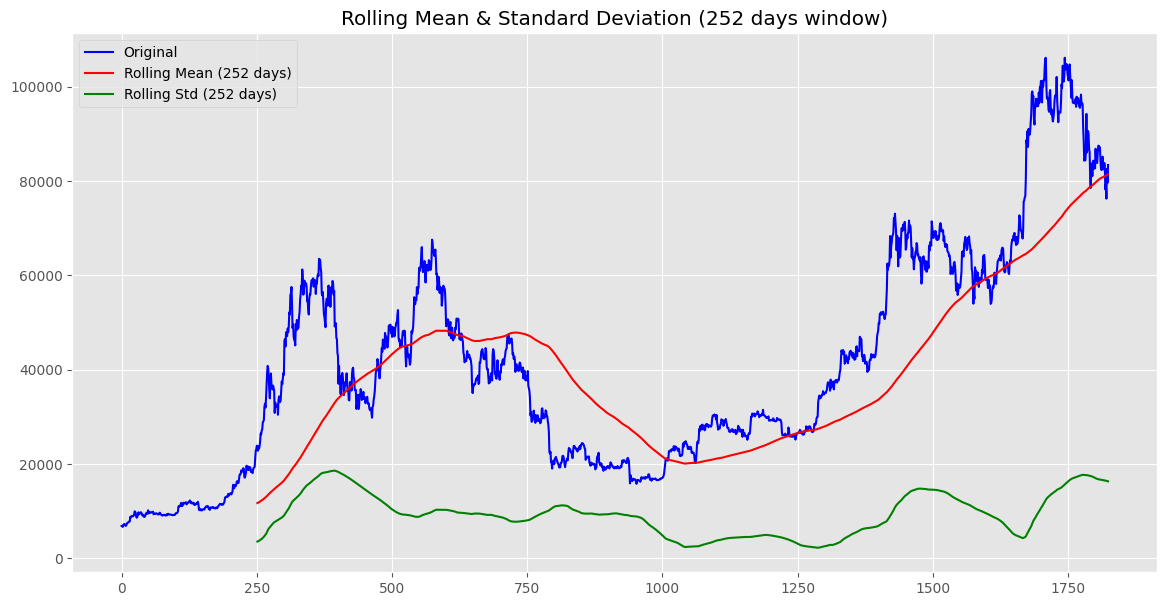

Results of Dickey-Fuller Test:
Test Statistic                   -1.123614
p-value                           0.705564
#Lags Used                       25.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64
Result: The series is non-stationary (fail to reject the null hypothesis of non-stationarity)


In [ ]:
# Cell 17: Check stationarity of Bitcoin price
check_stationarity(btc_data['Close'])

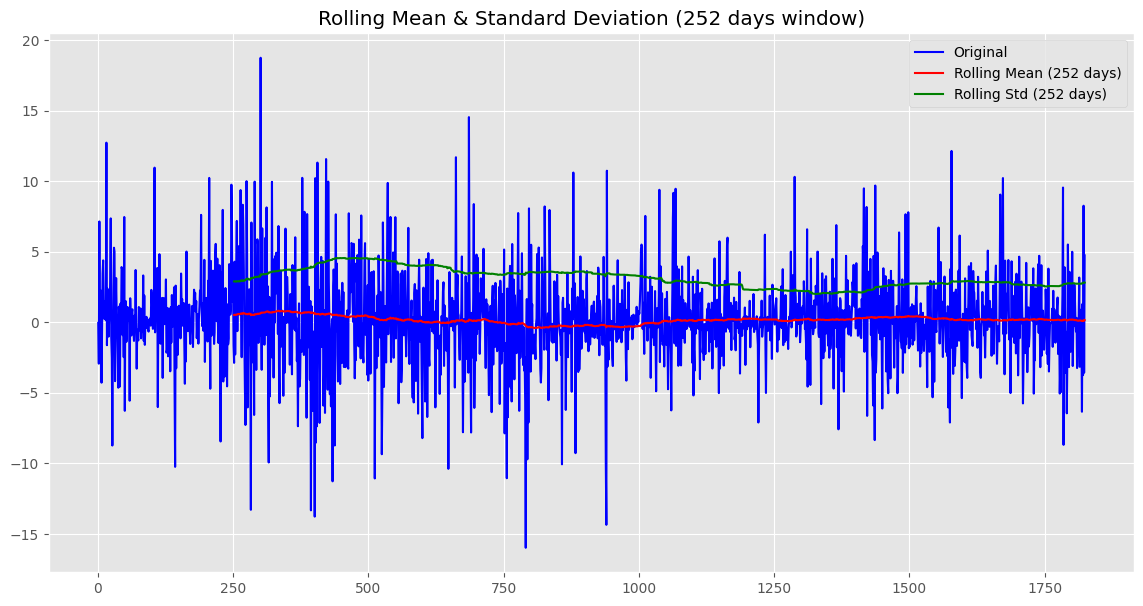

Results of Dickey-Fuller Test:
Test Statistic                -1.347129e+01
p-value                        3.378500e-25
#Lags Used                     8.000000e+00
Number of Observations Used    1.815000e+03
Critical Value (1%)           -3.433958e+00
Critical Value (5%)           -2.863134e+00
Critical Value (10%)          -2.567618e+00
dtype: float64
Result: The series is stationary (reject the null hypothesis of non-stationarity)


In [ ]:
# Cell 18: Check stationarity of price returns (which should be more stationary)
check_stationarity(btc_data['Daily_Return'].dropna())

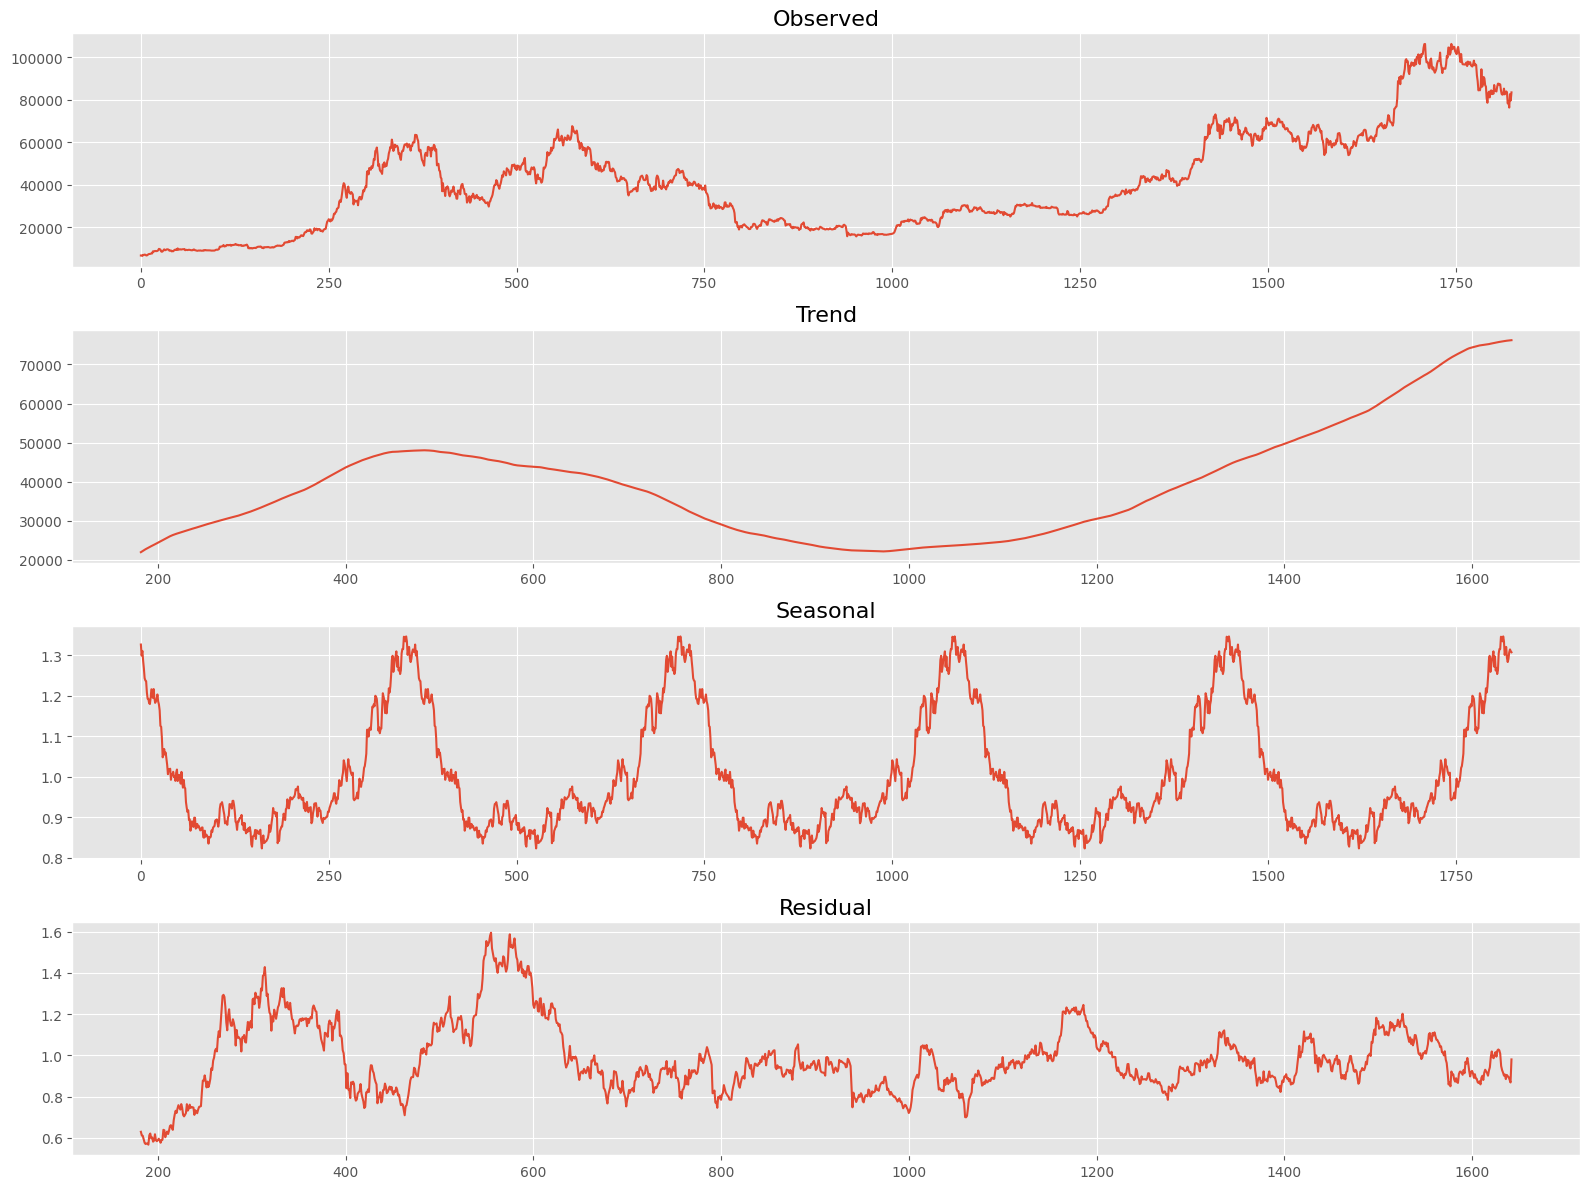

In [ ]:
# Cell 19: Visualize seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series into trend, seasonal, and residual components
try:
    decomposition = seasonal_decompose(btc_data['Close'], model='multiplicative', period=365)

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed', fontsize=16)
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend', fontsize=16)
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal', fontsize=16)
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual', fontsize=16)
    plt.tight_layout()
    plt.show()
except:
    print("Seasonal decomposition requires more data points than seasonal periods. Try with a smaller period.")
    try:
        decomposition = seasonal_decompose(btc_data['Close'], model='multiplicative', period=30)

        plt.figure(figsize=(16, 12))
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title('Observed', fontsize=16)
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.title('Trend', fontsize=16)
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.title('Seasonal', fontsize=16)
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.title('Residual', fontsize=16)
        plt.tight_layout()
        plt.show()
    except:
        print("Could not perform seasonal decomposition. This might be due to missing values or insufficient data.")

In [ ]:
# Cell 20: Summary of findings from EDA
print("Summary of EDA Findings:")
print(f"1. Data Range: {btc_data.index.min()} to {btc_data.index.max()}")
print(f"2. Price Range: ${btc_data['Close'].min():.2f} to ${btc_data['Close'].max():.2f}")
print(f"3. Average Daily Return: {btc_data['Daily_Return'].mean():.2f}%")
print(f"4. Average 30-day Volatility: {btc_data['Volatility'].mean():.2f}")
print("5. Stationarity: Check the Dickey-Fuller test results above")
print("6. Next steps: Apply appropriate transformations and proceed to modeling")

Summary of EDA Findings:
1. Data Range: 0 to 1824
2. Price Range: $6642.11 to $106146.27
3. Average Daily Return: 0.19%
4. Average 30-day Volatility: 3.00
5. Stationarity: Check the Dickey-Fuller test results above
6. Next steps: Apply appropriate transformations and proceed to modeling


Phase 2: Model Development and Training

In [ ]:
# Cell 1: Import necessary libraries for modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')
import math
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import pickle


In [ ]:
# Cell 2: Load the preprocessed data
btc_data = pd.read_csv('btc_data_processed.csv', index_col=0, parse_dates=True)
print(f"Data loaded with shape: {btc_data.shape}")
btc_data.head()

Data loaded with shape: (1766, 22)


,Date,Close,High,Low,Open,Volume,Daily_Return,Volatility,Close_Lag_1,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,Close_Lag_6,Close_Lag_7,MA_7,MA_14,MA_30,MA_60,Momentum_7,Momentum_14,Momentum_30
59,2020-06-11,9321.781250,9938.297852,9263.069336,9870.078125,30247143440,-5.555301,3.253787,9870.094727,9795.700195,9771.489258,9758.852539,9653.679688,9665.533203,9800.636719,9691.018694,9685.153878,9488.771940,8788.518083,-4.885963,-2.141246,5.875462
60,2020-06-12,9480.843750,9540.465820,9285.851562,9320.690430,22610564515,1.706353,3.125465,9321.781250,9870.094727,9795.700195,9771.489258,9758.852539,9653.679688,9665.533203,9664.634487,9688.133859,9495.800488,8832.448185,-1.910805,0.441987,2.274614
61,2020-06-13,9475.277344,9493.211914,9396.009766,9480.735352,17564322315,-0.058712,2.986463,9480.843750,9321.781250,9870.094727,9795.700195,9771.489258,9758.852539,9653.679688,9639.148438,9672.052665,9487.185677,8876.329012,-1.848024,-2.320898,-2.655144
62,2020-06-14,9386.788086,9482.270508,9347.593750,9477.553711,18991732746,-0.933896,2.889437,9475.277344,9480.843750,9321.781250,9870.094727,9795.700195,9771.489258,9758.852539,9585.996373,9666.747628,9489.138704,8922.073649,-3.812584,-0.785013,0.628104
63,2020-06-15,9450.702148,9504.860352,8990.175781,9386.035156,26699704768,0.680894,2.890449,9386.788086,9475.277344,9480.843750,9321.781250,9870.094727,9795.700195,9771.489258,9540.169643,9615.564314,9491.594987,8960.971948,-3.282889,-7.047777,0.785842


In [ ]:
# Cell 3: Feature selection based on correlation analysis
# We'll focus on the most relevant features for prediction
# Also, convert index to datetime if it's not already
if not isinstance(btc_data.index, pd.DatetimeIndex):
    btc_data.index = pd.to_datetime(btc_data.index)

# Select features for modeling
selected_features = ['Close', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3',
                     'MA_7', 'MA_30', 'Momentum_7', 'Momentum_30']

model_data = btc_data[selected_features].copy()
print(f"Selected features: {selected_features}")
print(f"Model data shape: {model_data.shape}")

Selected features: ['Close', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'MA_7', 'MA_30', 'Momentum_7', 'Momentum_30']
Model data shape: (1766, 8)


In [ ]:
# Cell 4: Prepare data for LSTM model
# Function to create time series dataset for LSTM
def create_lstm_dataset(data, target_col, feature_cols, lookback=30):
    """
    Create dataset for LSTM model with specified lookback period
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        # Use selected features from the lookback period
        features = []
        for j in range(lookback):
            row_features = data.iloc[i-j-1][feature_cols].values
            features.extend(row_features)
        X.append(features)
        # Target is the next day's closing price
        y.append(data.iloc[i][target_col])
    return np.array(X), np.array(y)

# Split data into training and testing sets (80/20)
split_idx = int(len(model_data) * 0.8)
train_data = model_data.iloc[:split_idx]
test_data = model_data.iloc[split_idx:]

print(f"Training data: {train_data.shape}")
print(f"Testing data: {test_data.shape}")


Training data: (1412, 8)
Testing data: (354, 8)


In [ ]:
# Cell 5: Scale the data for LSTM
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit scaler on training data only
X_train_cols = [col for col in selected_features if col != 'Close']
scaler_X.fit(train_data[X_train_cols])
scaler_y.fit(train_data[['Close']])

# Function for preprocessing data
def preprocess_data(data, scaler_X, scaler_y, feature_cols, target_col):
    """
    Scale the data and prepare it for LSTM model
    """
    X = scaler_X.transform(data[feature_cols])
    y = scaler_y.transform(data[[target_col]])
    return X, y

# Define the lookback period
lookback = 30
feature_cols = [col for col in selected_features if col != 'Close']
target_col = 'Close'

# Preprocess data for LSTM
X_train_scaled, y_train_scaled = preprocess_data(train_data, scaler_X, scaler_y, feature_cols, target_col)
X_test_scaled, y_test_scaled = preprocess_data(test_data, scaler_X, scaler_y, feature_cols, target_col)

# Reshape data for LSTM input [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print(f"LSTM Input shapes - X_train: {X_train_lstm.shape}, y_train: {y_train_scaled.shape}")


LSTM Input shapes - X_train: (1412, 1, 7), y_train: (1412, 1)


In [ ]:
# Cell 6: Build LSTM model
def build_lstm_model(input_shape):
    """
    Create an LSTM model for time series forecasting
    """
    model = Sequential()

    # LSTM layer with 100 units
    model.add(LSTM(units=100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Second LSTM layer
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))

    # Dense layers
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build and display model summary
lstm_model = build_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        43,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,701 (291.80 KB)

 Trainable params: 74,701 (291.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Cell 7: Train LSTM model
# Set up callbacks for early stopping and model checkpointing
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
print("\nTraining LSTM model...")
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)


Training LSTM model...
Epoch 1/100
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1420

36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.1292 - val_loss: 0.0089
Epoch 2/100
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0167 - val_loss: 9.7176e-04
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 5/100
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 8.1526e-04
Epoch 6/100
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 6.1486e-04
Epoch 7/100
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - val_loss: 5.5036e-04
Epoch 8/100
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019 - val_loss: 5.2002e-04
Epoch 9/100
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 3.2048e-04
Epoch 10/100
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018 - val_loss: 2.8537e-04
Epoch 11/100
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017 - val_loss: 2.8011e-04
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - val_loss: 4.2952e-04
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 3.5937e-04
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 6.0239e-04
Epoch 15/100
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 2.5250e-04
Epoch 16/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 2.9854e-04
Epoch 17/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 2.5736e-04
Epoch 18/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 3.9943e-04
Epoch 19/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 2.9682e-04
Epoch 20/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 4.5513e-04
Epoch 21/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 3.7357e-04
Epoch 22/100
25/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010    

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010 - val_loss: 2.2978e-04
Epoch 23/100
27/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 2.2925e-04
Epoch 24/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 2.3463e-04
Epoch 25/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 2.3602e-04
Epoch 26/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 2.4771e-04
Epoch 27/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 2.7165e-04
Epoch 28/100
26/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 2.1516e-04
Epoch 29/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 2.4607e-04
Epoch 30/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 3.4438e-04
Epoch 31/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8666e-04 - val_loss: 6.6521e-04
Epoch 32/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8732e-04 - val_loss: 2.7953e-04
Epoch 33/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6994e-04 - val_loss: 2.4871e-04
Epoch 34/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0226e-04 - val_loss: 3.4550e-04
Epoch 35/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5926e-04 - val_loss: 5.8826e-04
Epoch 36/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7998e-04 - val_loss: 2.8079e-04
Epoch 37/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4787e-04 - val_loss: 8.4289e-04
Epoch 38/100
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4248e-04

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3912e-04 - val_loss: 2.0568e-04
Epoch 39/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.0011e-04 - val_loss: 9.2824e-04
Epoch 40/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6894e-04 - val_loss: 2.5584e-04
Epoch 41/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7837e-04 - val_loss: 2.8454e-04
Epoch 42/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.2827e-04 - val_loss: 2.2360e-04
Epoch 43/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4441e-04 - val_loss: 2.0641e-04
Epoch 44/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4957e-04 - val_loss: 2.5302e-04
Epoch 45/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2763e-04 - val_loss: 2.3078e-04
Epoch 46/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7599e-04 - val_loss: 2.4121e-04
Epoch 47/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4537e-04 - val_loss: 3.2832e-04
Epoch 48/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0338e-04 - 

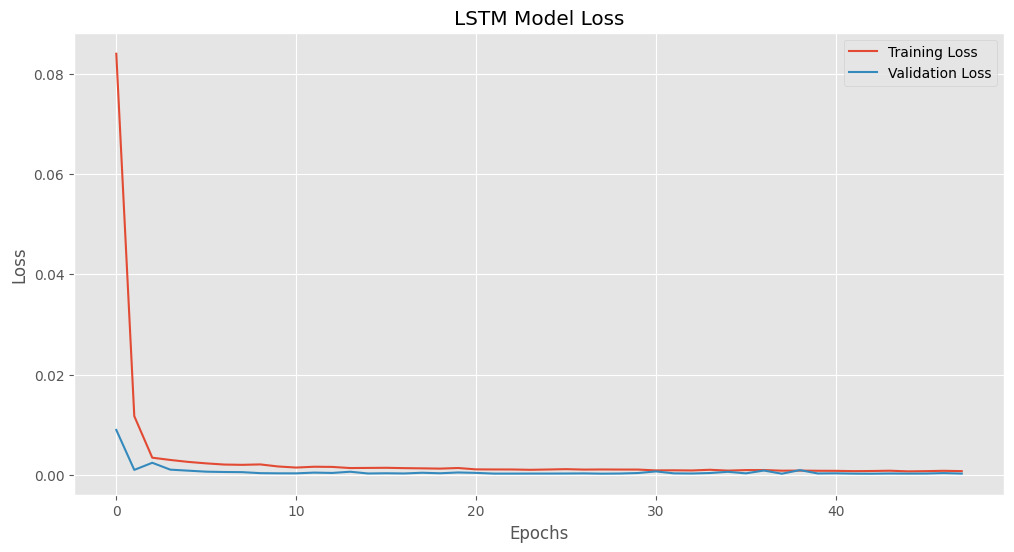

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

LSTM Model Performance:
MSE: 3844622.74
RMSE: 1960.77
MAE: 1488.14
R^2 Score: 0.9847


In [ ]:
# Cell 8: Evaluate LSTM model
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
lstm_pred_scaled = lstm_model.predict(X_test_lstm)
lstm_pred = scaler_y.inverse_transform(lstm_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Calculate performance metrics
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)

print(f"\nLSTM Model Performance:")
print(f"MSE: {lstm_mse:.2f}")
print(f"RMSE: {lstm_rmse:.2f}")
print(f"MAE: {lstm_mae:.2f}")
print(f"R^2 Score: {lstm_r2:.4f}")


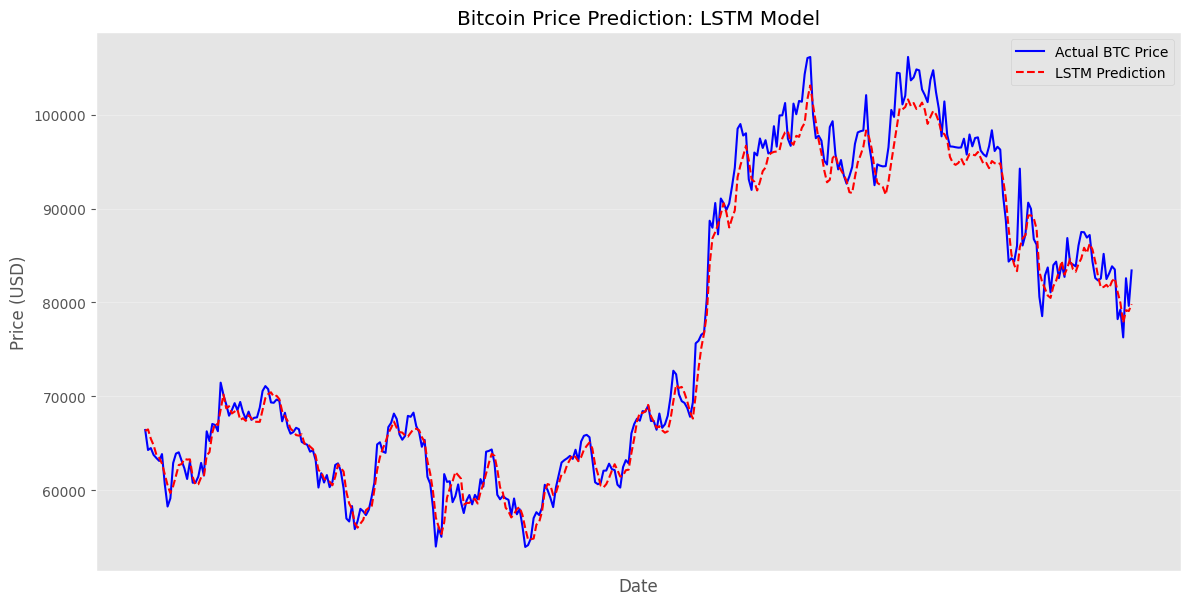

In [ ]:
# Cell 9: Plot LSTM predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, y_test, label='Actual BTC Price', color='blue')
plt.plot(test_data.index, lstm_pred, label='LSTM Prediction', color='red', linestyle='--')
plt.title('Bitcoin Price Prediction: LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Cell 10: Prepare data for ARIMA model
# We'll use the closing price for ARIMA modeling
arima_data = btc_data['Close'].copy()

# Split into train and test
arima_train = arima_data[:split_idx]
arima_test = arima_data[split_idx:]



Training ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1412
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12088.907
Date:                Sat, 12 Apr 2025   AIC                          24189.815
Time:                        21:56:53   BIC                          24221.327
Sample:                    01-01-1970   HQIC                         24201.590
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0555      0.019     -2.908      0.004      -0.093      -0.018
ar.L2          0.0156      0.020      0.766      0.444      -0.024       0.055
ar.L3          0.0420      

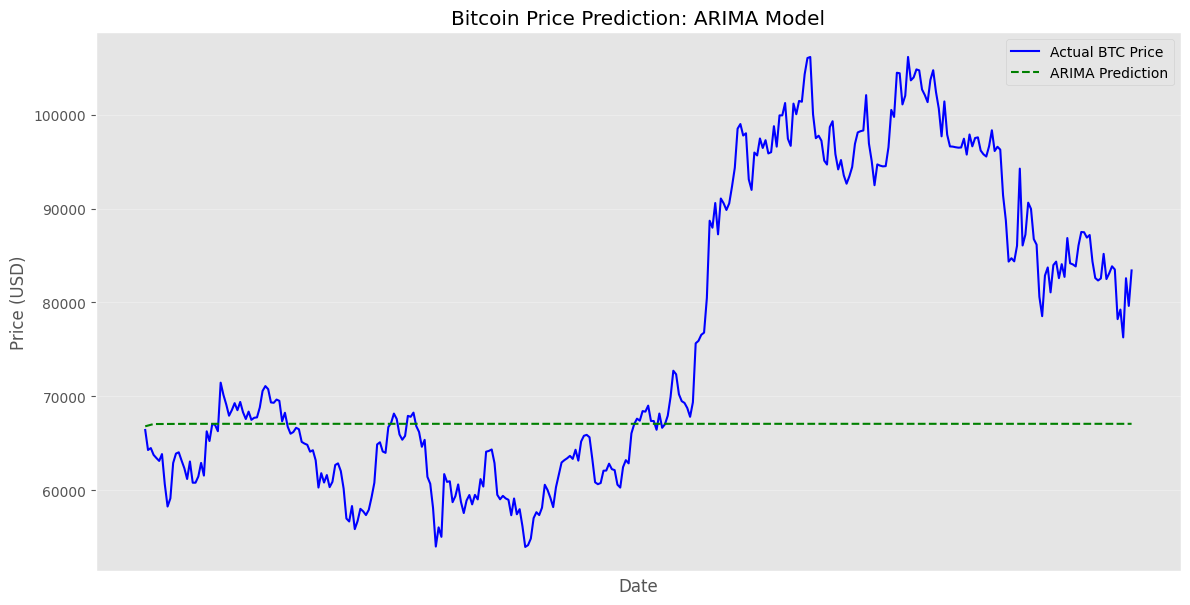

In [ ]:
# Cell 11: Build and train ARIMA model
print("\nTraining ARIMA model...")
# We'll use ARIMA(5,1,0) as a starting point
# The parameters (p,d,q) should be adjusted based on ACF/PACF analysis
try:
    arima_model = ARIMA(arima_train, order=(5, 1, 0))
    arima_fit = arima_model.fit()
    print(arima_fit.summary())

    # Make predictions
    arima_forecast = arima_fit.forecast(steps=len(arima_test))

    # Calculate performance metrics
    arima_mse = mean_squared_error(arima_test, arima_forecast)
    arima_rmse = np.sqrt(arima_mse)
    arima_mae = mean_absolute_error(arima_test, arima_forecast)
    arima_r2 = r2_score(arima_test, arima_forecast)

    print(f"\nARIMA Model Performance:")
    print(f"MSE: {arima_mse:.2f}")
    print(f"RMSE: {arima_rmse:.2f}")
    print(f"MAE: {arima_mae:.2f}")
    print(f"R^2 Score: {arima_r2:.4f}")

    # Plot ARIMA predictions
    plt.figure(figsize=(14, 7))
    plt.plot(arima_test.index, arima_test.values, label='Actual BTC Price', color='blue')
    plt.plot(arima_test.index, arima_forecast, label='ARIMA Prediction', color='green', linestyle='--')
    plt.title('Bitcoin Price Prediction: ARIMA Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
    print("Trying simplified ARIMA parameters...")
    try:
        arima_model = ARIMA(arima_train, order=(1, 1, 0))
        arima_fit = arima_model.fit()
        print(arima_fit.summary())

        # Make predictions
        arima_forecast = arima_fit.forecast(steps=len(arima_test))

        # Calculate performance metrics
        arima_mse = mean_squared_error(arima_test, arima_forecast)
        arima_rmse = np.sqrt(arima_mse)
        arima_mae = mean_absolute_error(arima_test, arima_forecast)
        arima_r2 = r2_score(arima_test, arima_forecast)

        print(f"\nARIMA Model Performance:")
        print(f"MSE: {arima_mse:.2f}")
        print(f"RMSE: {arima_rmse:.2f}")
        print(f"MAE: {arima_mae:.2f}")
        print(f"R^2 Score: {arima_r2:.4f}")

        # Plot ARIMA predictions
        plt.figure(figsize=(14, 7))
        plt.plot(arima_test.index, arima_test.values, label='Actual BTC Price', color='blue')
        plt.plot(arima_test.index, arima_forecast, label='ARIMA Prediction', color='green', linestyle='--')
        plt.title('Bitcoin Price Prediction: ARIMA Model')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"Error fitting simplified ARIMA model: {e}")
        print("Skipping ARIMA model due to errors.")


In [ ]:
# Cell 12: Prepare data for Prophet model
print("\nTraining Prophet model...")
# Prophet requires a specific data format with 'ds' and 'y' columns
prophet_data = pd.DataFrame({
    'ds': btc_data.index,
    'y': btc_data['Close']
})

# Split into train and test
prophet_train = prophet_data.iloc[:split_idx]
prophet_test = prophet_data.iloc[split_idx:]



Training Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbn3i0c/u4_otxe0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbn3i0c/zglm2oti.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44583', 'data', 'file=/tmp/tmp0mbn3i0c/u4_otxe0.json', 'init=/tmp/tmp0mbn3i0c/zglm2oti.json', 'output', 'file=/tmp/tmp0mbn3i0c/prophet_modellwna0vp1/prophet_model-20250412215739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:57:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet Model Performance:
MSE: 4947500624581769560881223493497126912.00
RMSE: 2224297782353291264.00
MAE: 1927656367915239680.00
R^2 Score: -19703639520882605587177668608.0000


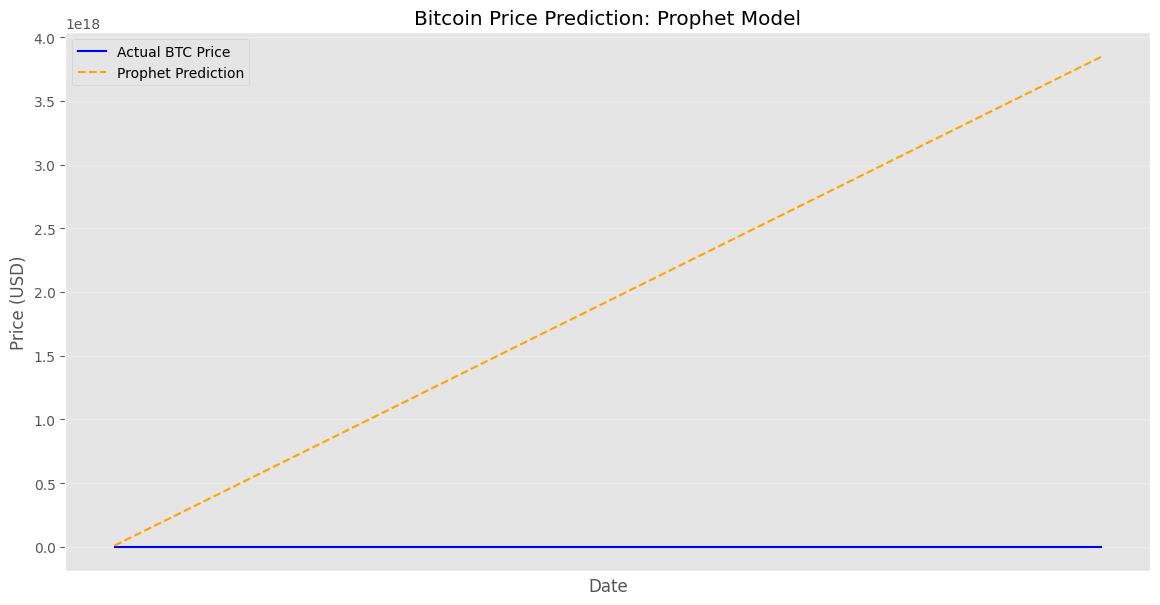

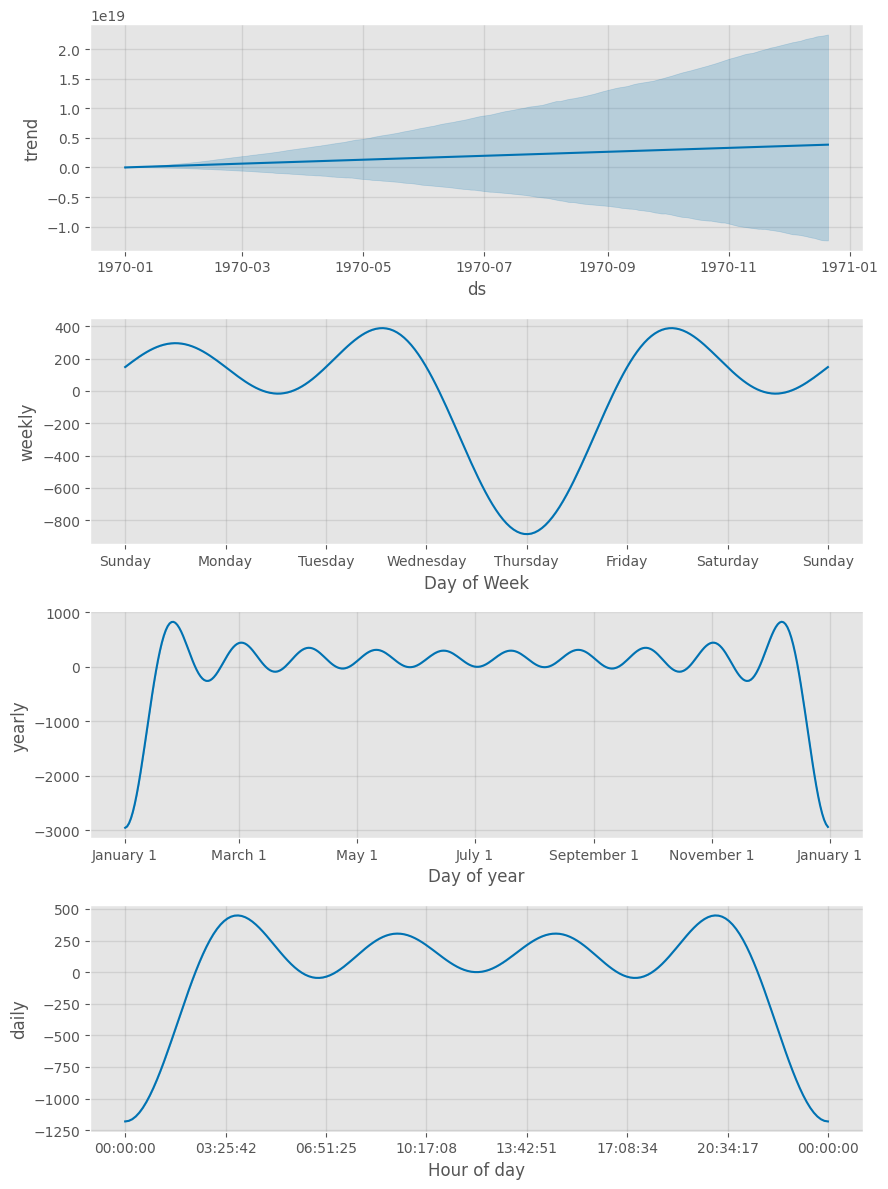

In [ ]:
# Cell 13: Build and train Prophet model
try:
    # Initialize and fit Prophet model
    prophet_model = Prophet(
        daily_seasonality=True,
        yearly_seasonality=True,
        weekly_seasonality=True,
        changepoint_prior_scale=0.05
    )
    prophet_model.fit(prophet_train)

    # Make future dataframe for predictions
    future_df = prophet_model.make_future_dataframe(periods=len(prophet_test), freq='D')
    prophet_forecast = prophet_model.predict(future_df)

    # Extract predictions for test period
    prophet_pred = prophet_forecast.iloc[-len(prophet_test):]['yhat'].values

    # Calculate performance metrics
    prophet_mse = mean_squared_error(prophet_test['y'], prophet_pred)
    prophet_rmse = np.sqrt(prophet_mse)
    prophet_mae = mean_absolute_error(prophet_test['y'], prophet_pred)
    prophet_r2 = r2_score(prophet_test['y'], prophet_pred)

    print(f"\nProphet Model Performance:")
    print(f"MSE: {prophet_mse:.2f}")
    print(f"RMSE: {prophet_rmse:.2f}")
    print(f"MAE: {prophet_mae:.2f}")
    print(f"R^2 Score: {prophet_r2:.4f}")

    # Plot Prophet forecast
    plt.figure(figsize=(14, 7))
    plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual BTC Price', color='blue')
    plt.plot(prophet_test['ds'], prophet_pred, label='Prophet Prediction', color='orange', linestyle='--')
    plt.title('Bitcoin Price Prediction: Prophet Model')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot Prophet components
    prophet_fig = prophet_model.plot_components(prophet_forecast)
    plt.show()
except Exception as e:
    print(f"Error fitting Prophet model: {e}")
    print("Skipping Prophet model due to errors.")


In [ ]:
# Cell 14: Compare model performances
model_performances = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R^2 Score'],
    'LSTM': [lstm_mse, lstm_rmse, lstm_mae, lstm_r2]
})

# Add ARIMA results if available
try:
    model_performances['ARIMA'] = [arima_mse, arima_rmse, arima_mae, arima_r2]
except:
    pass

# Add Prophet results if available
try:
    model_performances['Prophet'] = [prophet_mse, prophet_rmse, prophet_mae, prophet_r2]
except:
    pass

print("\nModel Performance Comparison:")
print(model_performances)



Model Performance Comparison:
      Metric          LSTM         ARIMA       Prophet
0        MSE  3.844623e+06  3.412976e+08  4.947501e+36
1       RMSE  1.960771e+03  1.847424e+04  2.224298e+18
2        MAE  1.488143e+03  1.398322e+04  1.927656e+18
3  R^2 Score  9.846886e-01 -3.592328e-01 -1.970364e+28


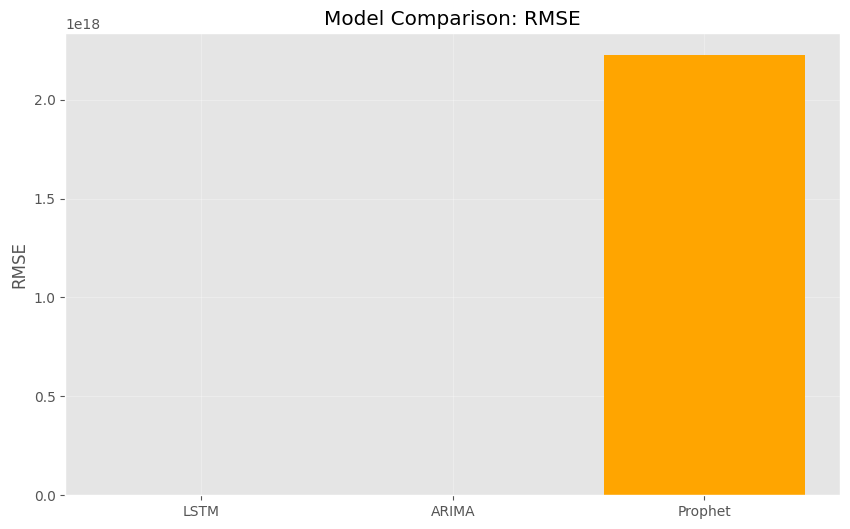

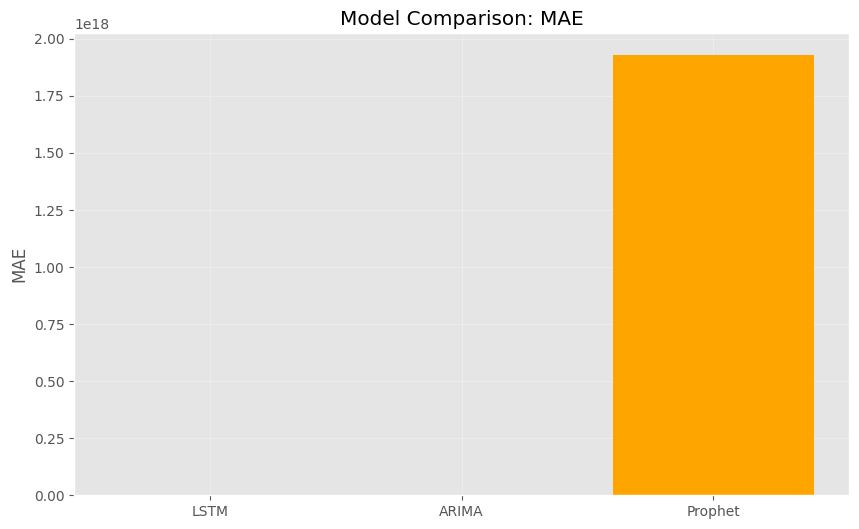

In [ ]:
# Cell 15: Visualize performance comparison
metrics_to_plot = ['RMSE', 'MAE']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    metric_data = model_performances[model_performances['Metric'] == metric].iloc[0, 1:].values
    metric_labels = model_performances.columns[1:]

    plt.bar(metric_labels, metric_data, color=['blue', 'green', 'orange'])
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
# Cell 16: Save the best model
# We'll choose based on lowest RMSE
try:
    best_model_idx = np.argmin(model_performances[model_performances['Metric'] == 'RMSE'].iloc[0, 1:].values)
    best_model_name = model_performances.columns[1:][best_model_idx]
    print(f"\nBest performing model based on RMSE: {best_model_name}")

    if best_model_name == 'LSTM':
        # Save LSTM model
        lstm_model.save('best_model_lstm.h5')
        # Save scalers
        with open('lstm_scaler_X.pkl', 'wb') as f:
            pickle.dump(scaler_X, f)
        with open('lstm_scaler_y.pkl', 'wb') as f:
            pickle.dump(scaler_y, f)
        print("LSTM model and scalers saved.")
    elif best_model_name == 'ARIMA':
        # Save ARIMA model
        with open('best_model_arima.pkl', 'wb') as f:
            pickle.dump(arima_fit, f)
        print("ARIMA model saved.")
    elif best_model_name == 'Prophet':
        # Save Prophet model
        with open('best_model_prophet.pkl', 'wb') as f:
            pickle.dump(prophet_model, f)
        print("Prophet model saved.")

    print("\nPhase 2 complete! Models have been trained and evaluated.")
except Exception as e:
    print(f"Error saving best model: {e}")
    print("Phase 2 complete but couldn't save the best model.")


Best performing model based on RMSE: LSTM
LSTM model and scalers saved.

Phase 2 complete! Models have been trained and evaluated.


Phase 3: Evaluation and Prediction

In [ ]:
# Cell 1: Import necessary libraries for evaluation and prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import load_model
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# For calculating additional metrics
from math import sqrt
from scipy.stats import pearsonr
import json

print("Libraries imported successfully for Phase 3: Evaluation & Prediction")

Libraries imported successfully for Phase 3: Evaluation & Prediction


In [ ]:
# Cell 2: Load the best model (LSTM) and preprocessed data
# Load data
btc_data = pd.read_csv('btc_data_processed.csv', index_col=0, parse_dates=True)
print(f"Data loaded with shape: {btc_data.shape}")

# Load model
try:
    lstm_model = load_model('best_model_lstm.h5')
    print("LSTM model loaded successfully")
except:
    try:
        lstm_model = load_model('best_lstm_model.h5')
        print("LSTM model loaded successfully (from checkpoint)")
    except Exception as e:
        print(f"Error loading model: {e}")
        raise

# Load scalers
try:
    with open('lstm_scaler_X.pkl', 'rb') as f:
        scaler_X = pickle.load(f)
    with open('lstm_scaler_y.pkl', 'rb') as f:
        scaler_y = pickle.load(f)
    print("Scalers loaded successfully")
except Exception as e:
    print(f"Error loading scalers: {e}")
    raise

Data loaded with shape: (1766, 22)


LSTM model loaded successfully
Scalers loaded successfully


In [ ]:
# Cell 3: Define helper functions for prediction and evaluation
def prepare_lstm_input(data, scaler_X, feature_cols):
    """
    Prepare input for LSTM prediction
    """
    X = scaler_X.transform(data[feature_cols])
    X_lstm = X.reshape((X.shape[0], 1, X.shape[1]))
    return X_lstm

def evaluate_prediction(y_true, y_pred, model_name="Model"):
    """
    Calculate and print multiple evaluation metrics
    """
    # Standard metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    correlation, _ = pearsonr(y_true.flatten(), y_pred.flatten())

    # Calculate directional accuracy
    direction_true = np.diff(y_true.flatten())
    direction_pred = np.diff(y_pred.flatten())
    directional_accuracy = np.mean((direction_true > 0) == (direction_pred > 0)) * 100

    print(f"\n{model_name} Performance Metrics:")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")
    print(f"Correlation: {correlation:.4f}")
    print(f"Directional Accuracy: {directional_accuracy:.2f}%")

    # Return metrics as a dictionary
    metrics = {
        'model': model_name,
        'rmse': float(rmse),
        'mae': float(mae),
        'mape': float(mape),
        'r2': float(r2),
        'correlation': float(correlation),
        'directional_accuracy': float(directional_accuracy)
    }

    return metrics

def generate_interactive_chart(dates, actual_values, predicted_values, model_name="LSTM Model"):
    """
    Generate an interactive chart using Plotly
    """
    fig = make_subplots(rows=2, cols=1,
                      shared_xaxes=True,
                      vertical_spacing=0.1,
                      subplot_titles=(f'Bitcoin Price: Actual vs {model_name} Prediction',
                                     'Prediction Error'))

    # Price chart
    fig.add_trace(
        go.Scatter(x=dates, y=actual_values.flatten(), name="Actual Price"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=dates, y=predicted_values.flatten(), name="Predicted Price"),
        row=1, col=1
    )

    # Error chart (actual - predicted)
    error = actual_values.flatten() - predicted_values.flatten()
    fig.add_trace(
        go.Bar(x=dates, y=error, name="Prediction Error"),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        title_text=f"Bitcoin Price Prediction Evaluation ({model_name})",
        height=800,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        template="plotly_white"
    )

    fig.update_yaxes(title_text="Price (USD)", row=1, col=1)
    fig.update_yaxes(title_text="Error (USD)", row=2, col=1)

    return fig


In [ ]:
# Cell 4: Set up prediction timeline and features
# Define features for prediction
selected_features = ['Close', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3',
                     'MA_7', 'MA_30', 'Momentum_7', 'Momentum_30']

feature_cols = [col for col in selected_features if col != 'Close']
target_col = 'Close'

# Split data into training and testing sets (80/20)
# This should match what was done in Phase 2
split_idx = int(len(btc_data) * 0.8)
train_data = btc_data.iloc[:split_idx]
test_data = btc_data.iloc[split_idx:]

print(f"Training data: {train_data.shape}")
print(f"Testing data: {test_data.shape}")


Training data: (1412, 22)
Testing data: (354, 22)


In [ ]:
# Cell 5: Perform in-sample predictions on test data
# Prepare test data for LSTM
X_test = prepare_lstm_input(test_data, scaler_X, feature_cols)

# Make predictions
y_test_scaled = test_data[[target_col]].values
y_test_pred_scaled = lstm_model.predict(X_test)

# Inverse transform to get actual prices
y_test_actual = scaler_y.inverse_transform(scaler_y.transform(y_test_scaled))
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Evaluate test predictions
test_metrics = evaluate_prediction(y_test_actual, y_test_pred, "LSTM Test Set")

# Create interactive chart
test_plot = generate_interactive_chart(test_data.index, y_test_actual, y_test_pred, "LSTM Test Set")
test_plot.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

LSTM Test Set Performance Metrics:
RMSE: $1960.77
MAE: $1488.14
MAPE: 1.87%
R² Score: 0.9847
Correlation: 0.9947
Directional Accuracy: 67.14%


In [ ]:
# Cell 6: Implement walk-forward validation
def walk_forward_validation(model, data, feature_cols, target_col, scaler_X, scaler_y, window_size=30):
    """
    Perform walk-forward validation
    """
    predictions = []
    actuals = []
    dates = []

    # Start from the beginning of test data
    for i in range(len(data) - window_size):
        # Get the window of data
        window = data.iloc[i:i+window_size]
        next_day = data.iloc[i+window_size]

        # Prepare input
        X = prepare_lstm_input(window, scaler_X, feature_cols)

        # Make prediction
        y_pred_scaled = model.predict(X)
        y_pred = scaler_y.inverse_transform(y_pred_scaled)

        # Get actual value
        y_actual = next_day[target_col]

        # Append to results
        predictions.append(y_pred[-1][0])
        actuals.append(y_actual)
        dates.append(next_day.name)

    return np.array(predictions), np.array(actuals), dates

print("\nPerforming walk-forward validation...")
# We'll use a smaller window for walk-forward validation to have more prediction points
wf_window = 30

# Select data for walk-forward validation (last 25% of data)
wf_start_idx = int(len(btc_data) * 0.75)
wf_data = btc_data.iloc[wf_start_idx:]

# Run walk-forward validation
wf_predictions, wf_actuals, wf_dates = walk_forward_validation(
    lstm_model, wf_data, feature_cols, target_col, scaler_X, scaler_y, wf_window
)

# Evaluate walk-forward validation
wf_metrics = evaluate_prediction(
    wf_actuals.reshape(-1, 1),
    wf_predictions.reshape(-1, 1),
    "LSTM Walk-Forward Validation"
)

# Create interactive chart for walk-forward validation
wf_plot = generate_interactive_chart(
    wf_dates,
    wf_actuals.reshape(-1, 1),
    wf_predictions.reshape(-1, 1),
    "LSTM Walk-Forward Validation"
)
wf_plot.show()


Performing walk-forward validation...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━


Performing backtesting...

Backtesting Results:
Initial Capital: $10000.00
Final Portfolio Value: $12458.19
Total Return: 24.58%
Buy and Hold Return: 61.22%
Number of Trades: 124


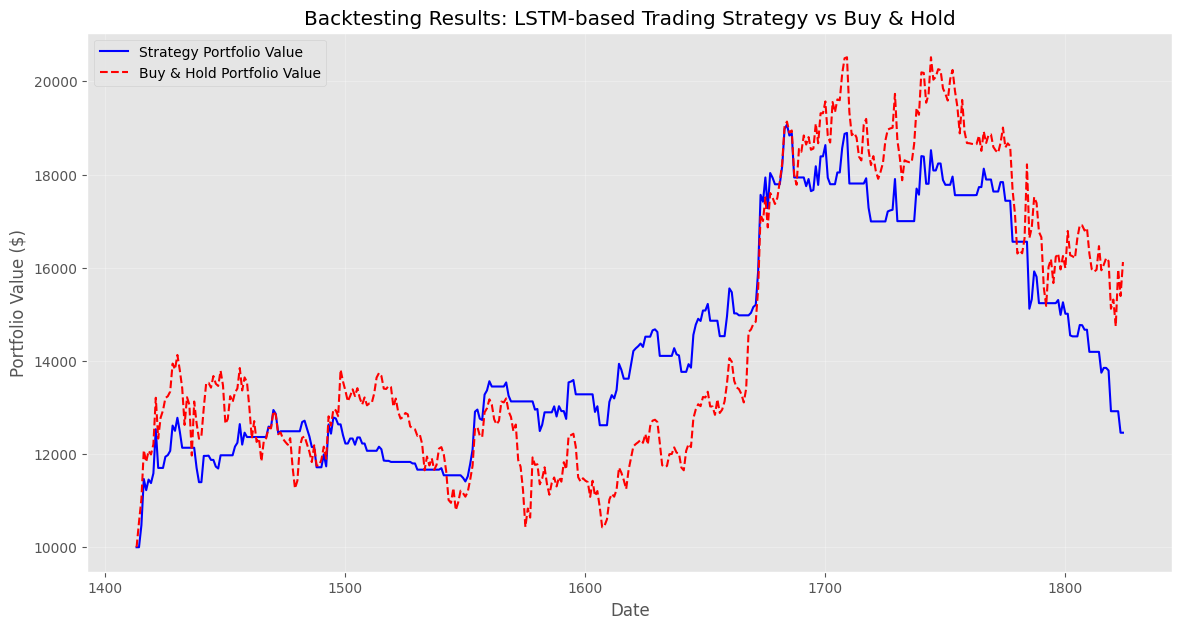

In [ ]:
# Cell 7: Perform backtesting with different trading strategies
def backtest_strategy(actual_prices, predicted_prices, initial_capital=10000):
    """
    Backtest a simple trading strategy based on predictions
    """
    capital = initial_capital
    btc_holdings = 0
    trades = []
    portfolio_values = [capital]

    # Create signals: 1 for buy, -1 for sell, 0 for hold
    price_direction = np.diff(predicted_prices.flatten())
    signals = np.zeros(len(price_direction))
    signals[price_direction > 0] = 1  # Buy signal
    signals[price_direction < 0] = -1  # Sell signal

    # Simulate trading
    for i in range(len(signals)):
        current_price = actual_prices[i][0]
        next_price = actual_prices[i+1][0] if i < len(signals)-1 else actual_prices[i][0]

        if signals[i] == 1 and capital > 0:  # Buy signal
            btc_to_buy = capital / current_price
            btc_holdings += btc_to_buy
            trades.append(f"Buy: {btc_to_buy:.4f} BTC at ${current_price:.2f}")
            capital = 0

        elif signals[i] == -1 and btc_holdings > 0:  # Sell signal
            capital += btc_holdings * current_price
            trades.append(f"Sell: {btc_holdings:.4f} BTC at ${current_price:.2f}")
            btc_holdings = 0

        # Calculate portfolio value
        portfolio_value = capital + (btc_holdings * next_price)
        portfolio_values.append(portfolio_value)

    # Calculate final performance
    total_return = (portfolio_values[-1] - initial_capital) / initial_capital * 100

    # Calculate buy and hold performance
    buy_hold_return = (actual_prices[-1][0] - actual_prices[0][0]) / actual_prices[0][0] * 100

    print("\nBacktesting Results:")
    print(f"Initial Capital: ${initial_capital:.2f}")
    print(f"Final Portfolio Value: ${portfolio_values[-1]:.2f}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Buy and Hold Return: {buy_hold_return:.2f}%")
    print(f"Number of Trades: {len(trades)}")

    # Return results for plotting
    return {
        'portfolio_values': portfolio_values,
        'buy_hold_values': [initial_capital * (1 + (actual_prices[i][0] - actual_prices[0][0]) / actual_prices[0][0]) for i in range(len(actual_prices))],
        'dates': wf_dates,
        'total_return': total_return,
        'buy_hold_return': buy_hold_return,
        'trades': trades
    }

# Run backtesting
print("\nPerforming backtesting...")
backtest_results = backtest_strategy(
    wf_actuals.reshape(-1, 1),
    wf_predictions.reshape(-1, 1)
)

# Plot backtesting results
plt.figure(figsize=(14, 7))
plt.plot(backtest_results['dates'], backtest_results['portfolio_values'], label='Strategy Portfolio Value', color='blue')
plt.plot(backtest_results['dates'], backtest_results['buy_hold_values'], label='Buy & Hold Portfolio Value', color='red', linestyle='--')
plt.title('Backtesting Results: LSTM-based Trading Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Index type of recent_data: <class 'pandas.core.indexes.base.Index'>
First index value type: <class 'numpy.int64'>
Last index value: 1824
Converting index to DatetimeIndex

Generating future predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66

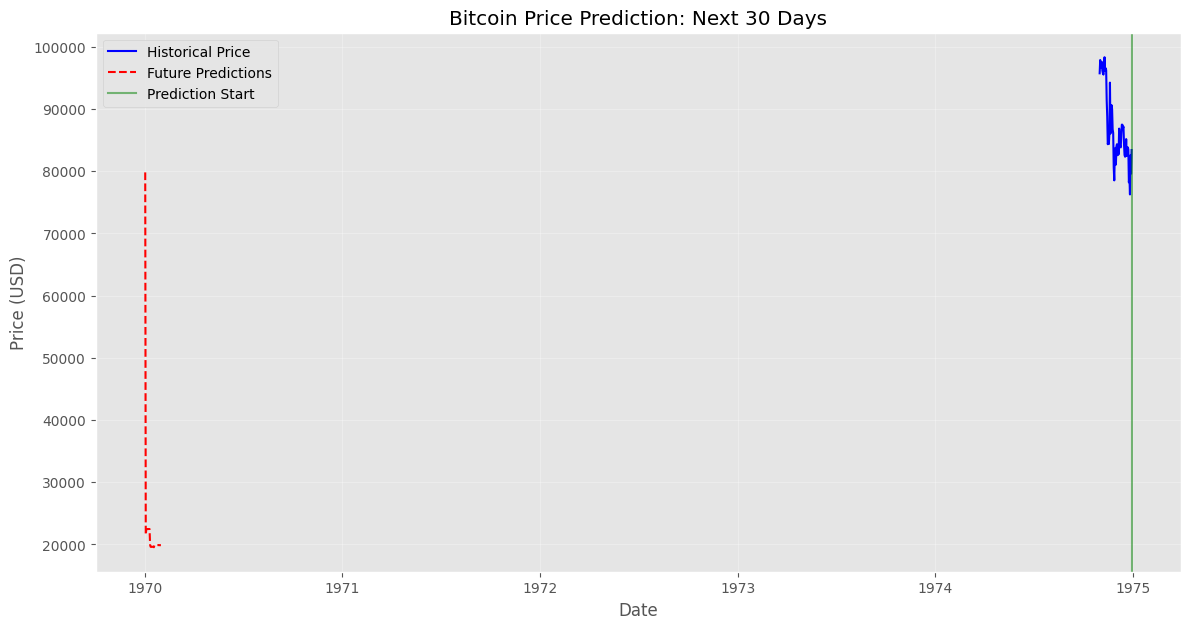

In [ ]:
# Cell 8 (Fixed): Create prediction system for future prices
def generate_future_prediction(model, last_data, feature_cols, target_col, scaler_X, scaler_y, days=30):
    """
    Generate predictions for future days
    """
    # Make a copy of the last N days of data
    future_data = last_data.copy()

    predictions = []
    prediction_dates = []

    # Generate predictions one day at a time
    last_date = future_data.index[-1]  # This should be a datetime object from the DataFrame index

    for i in range(days):
        # Prepare input data
        X = prepare_lstm_input(future_data, scaler_X, feature_cols)

        # Make prediction for next day
        next_day_scaled = model.predict(X)
        next_day_price = scaler_y.inverse_transform(next_day_scaled)[-1][0]

        # Append prediction
        predictions.append(next_day_price)

        # Create next date (fix for the error)
        if isinstance(last_date, (int, float)):
            # If last_date is somehow an integer, convert to proper datetime
            print("Warning: Converting index to datetime")
            next_date = pd.to_datetime(last_date) + timedelta(days=i+1)
        else:
            next_date = last_date + timedelta(days=i+1)

        prediction_dates.append(next_date)

        # Create new row with predicted value
        new_row = pd.Series(index=future_data.columns)
        new_row[target_col] = next_day_price

        # Update lagged values
        for lag in range(1, 4):
            lag_col = f'Close_Lag_{lag}'
            if lag == 1:
                new_row[lag_col] = future_data.iloc[-1][target_col]
            else:
                new_row[lag_col] = future_data.iloc[-1][f'Close_Lag_{lag-1}']

        # Update moving averages and momentum (simplified approach)
        new_row['MA_7'] = (future_data.iloc[-6:][target_col].sum() + next_day_price) / 7
        new_row['MA_30'] = (future_data.iloc[-29:][target_col].sum() + next_day_price) / 30
        new_row['Momentum_7'] = next_day_price - future_data.iloc[-7][target_col]
        new_row['Momentum_30'] = next_day_price - future_data.iloc[-30][target_col]

        # Append new row to future_data and ensure the index is properly formatted
        new_df = pd.DataFrame([new_row], index=[next_date])
        future_data = pd.concat([future_data, new_df])

        # Remove oldest row to maintain same window size
        future_data = future_data.iloc[1:]

    return predictions, prediction_dates

# Get the most recent 30 days of data for future prediction
recent_data = btc_data.iloc[-30:]

# Debug print to check the index type
print(f"Index type of recent_data: {type(recent_data.index)}")
print(f"First index value type: {type(recent_data.index[0])}")
print(f"Last index value: {recent_data.index[-1]}")

# Ensure the index is datetime
if not isinstance(recent_data.index, pd.DatetimeIndex):
    print("Converting index to DatetimeIndex")
    recent_data.index = pd.to_datetime(recent_data.index)

# Generate future predictions
print("\nGenerating future predictions...")
future_days = 30
future_predictions, future_dates = generate_future_prediction(
    lstm_model, recent_data, feature_cols, target_col, scaler_X, scaler_y, future_days
)

# Now continue with the plotting code as before
# Plot future predictions
plt.figure(figsize=(14, 7))
# Plot historical data
plt.plot(btc_data.index[-60:], btc_data['Close'].iloc[-60:], label='Historical Price', color='blue')
# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='red', linestyle='--')
plt.axvline(x=btc_data.index[-1], color='green', linestyle='-', alpha=0.5, label='Prediction Start')
plt.title(f'Bitcoin Price Prediction: Next {future_days} Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Cell 9: Create interactive dashboard for future predictions
future_fig = go.Figure()

# Add historical prices
future_fig.add_trace(
    go.Scatter(
        x=btc_data.index[-60:],
        y=btc_data['Close'].iloc[-60:],
        name="Historical Price",
        line=dict(color='blue')
    )
)

# Add predicted prices
future_fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=future_predictions,
        name="Predicted Price",
        line=dict(color='red', dash='dash')
    )
)

# Add confidence interval (simple approach - 10% above and below)
future_fig.add_trace(
    go.Scatter(
        x=future_dates + future_dates[::-1],
        y=[p*1.1 for p in future_predictions] + [p*0.9 for p in future_predictions][::-1],
        fill='toself',
        fillcolor='rgba(255,0,0,0.1)',
        line=dict(color='rgba(255,0,0,0)'),
        name='Confidence Interval'
    )
)

# Add vertical line for prediction start
future_fig.add_vline(
    x=btc_data.index[-1],
    line_width=2,
    line_dash="dash",
    line_color="green",
    annotation_text="Prediction Start"
)

# Update layout
future_fig.update_layout(
    title_text=f"Bitcoin Price Prediction: Next {future_days} Days",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    template="plotly_white",
    height=600,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

future_fig.show()


In [ ]:
# Cell 10: Calculate potential profit analysis
def calculate_profit_potential(predictions):
    """
    Calculate potential profit scenarios based on predictions
    """
    start_price = predictions[0]
    end_price = predictions[-1]
    max_price = max(predictions)
    min_price = min(predictions)

    # Calculate potential returns
    hodl_return = (end_price - start_price) / start_price * 100
    best_case = (max_price - start_price) / start_price * 100
    worst_case = (min_price - start_price) / start_price * 100

    # Calculate volatility
    price_changes = np.diff(predictions) / predictions[:-1] * 100
    volatility = np.std(price_changes)

    print("\nProfit Potential Analysis:")
    print(f"Starting Price: ${start_price:.2f}")
    print(f"Ending Price: ${end_price:.2f}")

    print(f"\nHODL Strategy Return: {hodl_return:.2f}%")
    print(f"Best Case Return: {best_case:.2f}%")
    print(f"Worst Case Return: {worst_case:.2f}%")
    print(f"Expected Volatility: {volatility:.2f}%")

    # Return metrics for saving
    return {
        "start_price": float(start_price),
        "end_price": float(end_price),
        "hodl_return": float(hodl_return),
        "best_case": float(best_case),
        "worst_case": float(worst_case),
        "volatility": float(volatility)
    }

# Analyze profit potential
profit_metrics = calculate_profit_potential(future_predictions)



Profit Potential Analysis:
Starting Price: $79815.96
Ending Price: $19877.75

HODL Strategy Return: -75.10%
Best Case Return: 0.00%
Worst Case Return: -75.51%
Expected Volatility: 13.46%


In [ ]:
# Cell 11: Save results to file
# Create a results dictionary
results = {
    "model_name": "LSTM",
    "test_metrics": test_metrics,
    "wf_metrics": wf_metrics,
    "backtest_results": {
        "total_return": backtest_results["total_return"],
        "buy_hold_return": backtest_results["buy_hold_return"],
        "num_trades": len(backtest_results["trades"])
    },
    "future_predictions": {
        "dates": [d.strftime("%Y-%m-%d") for d in future_dates],
        "prices": [float(p) for p in future_predictions]
    },
    "profit_potential": profit_metrics,
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

# Save results to JSON file
with open('btc_prediction_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print("\nResults saved to btc_prediction_results.json")



Results saved to btc_prediction_results.json


In [ ]:
# Cell 12: Create summary report
print("\n" + "="*50)
print("BITCOIN PRICE PREDICTION - SUMMARY REPORT")
print("="*50)

print("\nModel Evaluation:")
print(f"Test Set RMSE: ${test_metrics['rmse']:.2f}")
print(f"Walk-Forward RMSE: ${wf_metrics['rmse']:.2f}")
print(f"Directional Accuracy: {wf_metrics['directional_accuracy']:.2f}%")

print("\nTrading Strategy Performance:")
print(f"Strategy Return: {backtest_results['total_return']:.2f}%")
print(f"Buy & Hold Return: {backtest_results['buy_hold_return']:.2f}%")
print(f"Number of Trades: {len(backtest_results['trades'])}")

print("\nFuture Price Prediction:")
print(f"Current Price: ${btc_data['Close'].iloc[-1]:.2f}")
print(f"Predicted Price (in {future_days} days): ${future_predictions[-1]:.2f}")
print(f"Expected Change: {(future_predictions[-1] - btc_data['Close'].iloc[-1]) / btc_data['Close'].iloc[-1] * 100:.2f}%")

print("\nRecommendation:")
if future_predictions[-1] > btc_data['Close'].iloc[-1]:
    print("BUY/HOLD - Our model predicts price appreciation")
else:
    print("SELL/WAIT - Our model predicts price depreciation")

print("\nDisclaimer: This prediction is for informational purposes only and")
print("should not be considered financial advice. Cryptocurrency prices are")
print("highly volatile and predictions can be inaccurate.")

print("\nPhase 3 complete! Evaluation and predictions have been generated.")


BITCOIN PRICE PREDICTION - SUMMARY REPORT

Model Evaluation:
Test Set RMSE: $1960.77
Walk-Forward RMSE: $2715.88
Directional Accuracy: 50.12%

Trading Strategy Performance:
Strategy Return: 24.58%
Buy & Hold Return: 61.22%
Number of Trades: 124

Future Price Prediction:
Current Price: $83404.84
Predicted Price (in 30 days): $19877.75
Expected Change: -76.17%

Recommendation:
SELL/WAIT - Our model predicts price depreciation

Disclaimer: This prediction is for informational purposes only and
should not be considered financial advice. Cryptocurrency prices are
highly volatile and predictions can be inaccurate.

Phase 3 complete! Evaluation and predictions have been generated.
